torch.Size([1, 3, 512, 512])
(512, 512, 3)


Text(0.5, 1.0, 'sharpness')

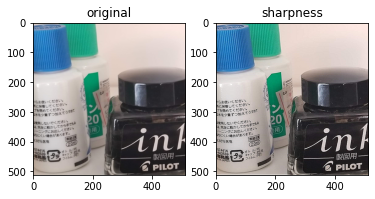

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch.nn.functional as F


H = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]], np.float32)

img = cv2.imread("ink.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")

rgb_array = np.asarray(img, np.float32)
    
# PyTorchのためにNHWCをNCHWとする
rgb_array = np.expand_dims(rgb_array, axis=0)
rgb_array = np.transpose(rgb_array, [0,3,1,2])
rgb_tensor = torch.as_tensor(rgb_array)
print(rgb_tensor.size())

weight_tensor = torch.as_tensor(H.reshape(1,1,3,3))
ans = torch.zeros((1, 3, 512, 512))
for i in range(3):
    ans[:, i, :, :] = F.conv2d(rgb_tensor[:, i:i+1, :, :], weight_tensor,  padding=1)

ans = ans[0]
ans = np.array(ans)
ans = np.transpose(ans, [1,2,0])
print(ans.shape)
ans = np.clip(ans, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(ans)
plt.title("sharpness")
